In [60]:
library(fpp3)

In [61]:
install.packages("zoo")
library(zoo)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [62]:
data <- read.csv(file = "/Users/chensiyan/Downloads/AEP_hourly.csv", header = TRUE) 
# |> 
#     mutate(Datetime=ymd_hms(Datetime)) |>
#     as_tsibble(index=Datetime)
print(data)

                 Datetime AEP_MW
1     2004-12-31 01:00:00  13478
2     2004-12-31 02:00:00  12865
3     2004-12-31 03:00:00  12577
4     2004-12-31 04:00:00  12517
5     2004-12-31 05:00:00  12670
6     2004-12-31 06:00:00  13038
7     2004-12-31 07:00:00  13692
8     2004-12-31 08:00:00  14297
9     2004-12-31 09:00:00  14719
10    2004-12-31 10:00:00  14941
11    2004-12-31 11:00:00  15184
12    2004-12-31 12:00:00  15009
13    2004-12-31 13:00:00  14808
14    2004-12-31 14:00:00  14522
15    2004-12-31 15:00:00  14349
16    2004-12-31 16:00:00  14107
17    2004-12-31 17:00:00  14410
18    2004-12-31 18:00:00  15174
19    2004-12-31 19:00:00  15261
20    2004-12-31 20:00:00  14774
21    2004-12-31 21:00:00  14363
22    2004-12-31 22:00:00  14045
23    2004-12-31 23:00:00  13478
24    2005-01-01 00:00:00  12892
25    2004-12-30 01:00:00  14097
26    2004-12-30 02:00:00  13667
27    2004-12-30 03:00:00  13451
28    2004-12-30 04:00:00  13379
29    2004-12-30 05:00:00  13506
30    2004

In [63]:
duplicates <- data[duplicated(data$Datetime) | duplicated(data$Datetime, fromLast = TRUE), ]
print(duplicates)

                  Datetime AEP_MW
82493  2014-11-02 02:00:00  12994
82494  2014-11-02 02:00:00  13190
91276  2015-11-01 02:00:00  10785
91277  2015-11-01 02:00:00  10542
99916  2016-11-06 02:00:00  10964
99917  2016-11-06 02:00:00  11008
108724 2017-11-05 02:00:00  10596
108725 2017-11-05 02:00:00  10446


In [64]:
data <- data |> distinct(Datetime, .keep_all = TRUE)

In [65]:
energy_consumption <- data |>
    mutate(Datetime = ymd_hms(Datetime)) |> 
    mutate(Date = as.Date(Datetime),       
           Time = format(Datetime, "%H:%M:%S")) |>
    as_tsibble(index = Datetime)
print(energy_consumption)

# A tsibble: 121,269 x 4 [1h] <UTC>
   Datetime            AEP_MW Date       Time    
   <dttm>               <dbl> <date>     <chr>   
 1 2004-10-01 01:00:00  12379 2004-10-01 01:00:00
 2 2004-10-01 02:00:00  11935 2004-10-01 02:00:00
 3 2004-10-01 03:00:00  11692 2004-10-01 03:00:00
 4 2004-10-01 04:00:00  11597 2004-10-01 04:00:00
 5 2004-10-01 05:00:00  11681 2004-10-01 05:00:00
 6 2004-10-01 06:00:00  12280 2004-10-01 06:00:00
 7 2004-10-01 07:00:00  13692 2004-10-01 07:00:00
 8 2004-10-01 08:00:00  14618 2004-10-01 08:00:00
 9 2004-10-01 09:00:00  14903 2004-10-01 09:00:00
10 2004-10-01 10:00:00  15118 2004-10-01 10:00:00
# i 121,259 more rows


In [66]:
energy_consumption <- energy_consumption |> 
    fill_gaps()

In [67]:
energy_consumption$AEP_MW <- na.approx(energy_consumption$AEP_MW, na.rm = FALSE)

In [68]:
sum(is.na(energy_consumption))

[1] 54

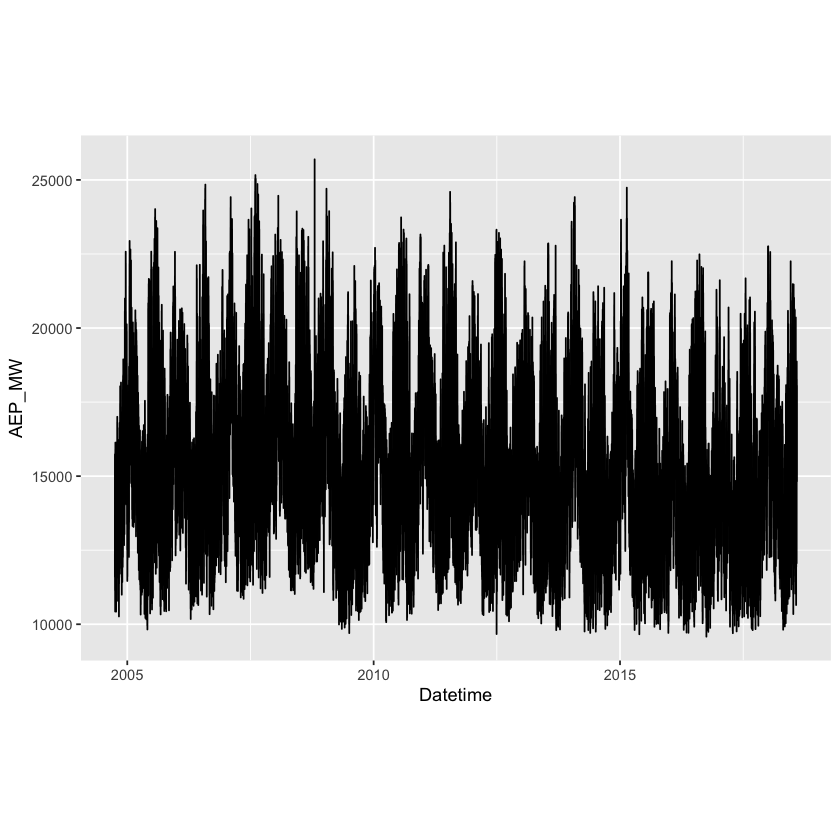

In [69]:
energy_consumption |> ggplot(aes(x=Datetime, y=AEP_MW)) + geom_line() + theme(aspect.ratio = 0.7)

In [70]:
dcmp <- energy_consumption |>
  model(stl = STL(AEP_MW))
components(dcmp)

.model,Datetime,AEP_MW,trend,season_day,season_week,season_year,remainder,season_adjust
<chr>,<dttm>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
stl,2004-10-01 01:00:00,12379,15319.50,-1619.80874,182.67985,-1979.975,476.60386,15796.10
stl,2004-10-01 02:00:00,11935,15319.58,-2103.67317,173.22931,-1955.442,501.30495,15820.89
stl,2004-10-01 03:00:00,11692,15319.66,-2321.58595,145.33545,-1999.015,547.60459,15867.27
stl,2004-10-01 04:00:00,11597,15319.74,-2392.59637,141.38490,-1998.777,527.24690,15846.99
stl,2004-10-01 05:00:00,11681,15319.82,-2298.96517,178.50769,-2013.107,494.74285,15814.56
stl,2004-10-01 06:00:00,12280,15319.90,-1733.59195,263.16466,-2042.984,473.50951,15793.41
stl,2004-10-01 07:00:00,13692,15319.98,-532.27823,489.54293,-2060.931,475.68435,15795.67
stl,2004-10-01 08:00:00,14618,15320.06,323.25661,563.07875,-2061.467,473.06945,15793.13
stl,2004-10-01 09:00:00,14903,15320.14,610.41835,458.37786,-2023.335,537.39593,15857.54


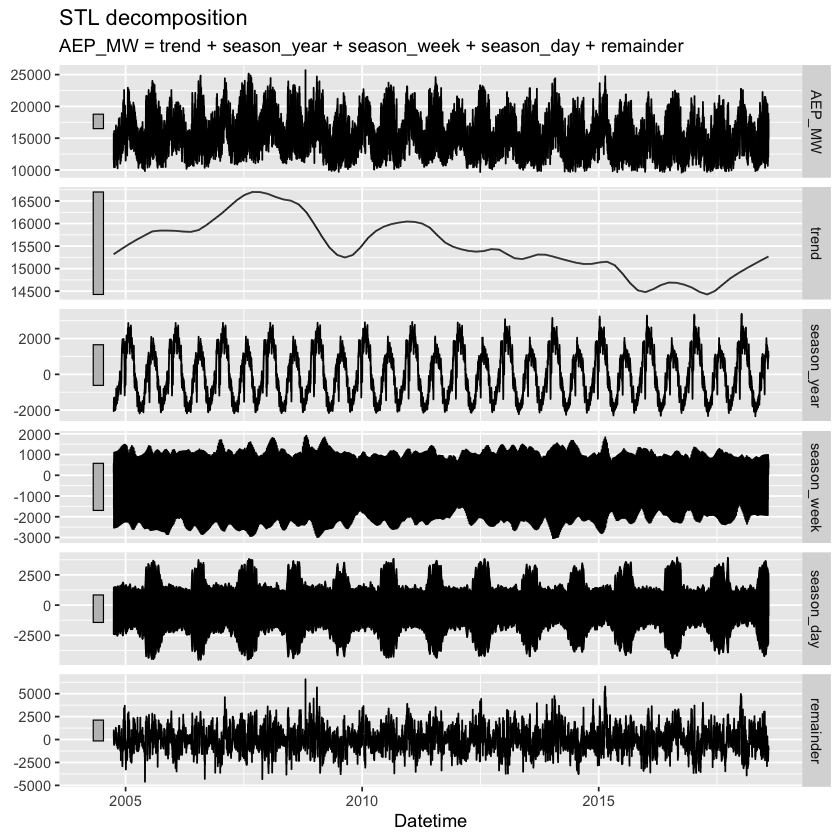

In [71]:
components(dcmp) |> autoplot()